# Fashion Classification 

# Problem statement 

The data set for this project consists of 70,000 images whihc is divided into 60,000 training sample and 10,000 testing sample. Each image is on 28x28 grayscale with 1 out of 10 label classes.
The 10 classes are listed below:
0 - T-shirt/top
1 - Trouser 
2 - Pullover 
3 - Dress 
4 - Coat 
5 - Sandal
6 - Shirt 
7 - Sneaker
8 - Bag
9 - Ankle Boot

The image has a width and height of 28 pixel which comes up to 784 pixels in total. Each pixel has a pixel value which translates to the grey shade. The values ranges from 0 to 255. The higher the value, the darker the pixel is.



# Importing data 

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random #random give random values within a set range

In [5]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep= ',')

In [6]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep= ',')

# Data Visualization 

In [7]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [11]:
fashion_train_df.shape

(60000, 785)

In [12]:
fashion_test_df.shape

(10000, 785)

In [13]:
training = np.array(fashion_train_df, dtype = 'float32')# data type float 32

In [14]:
testing = np.array(fashion_test_df, dtype = 'float32')# data type float 32

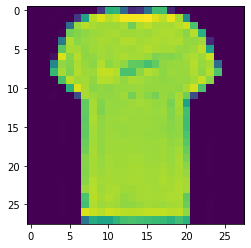

In [15]:
plt.imshow(training[10, 1:].reshape(28,28)) #imshow shows image and reshape show the image in the given dimension 

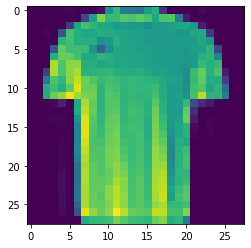

In [16]:
plt.imshow(training[600, 1:].reshape(28,28))

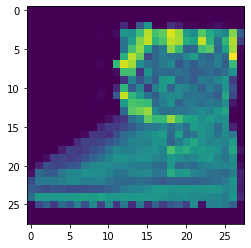

In [17]:
plt.imshow(training[12,1:].reshape(28,28))

7.0

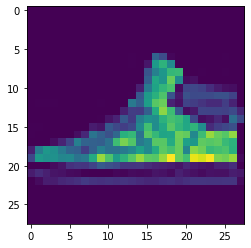

In [18]:
i = random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]
label

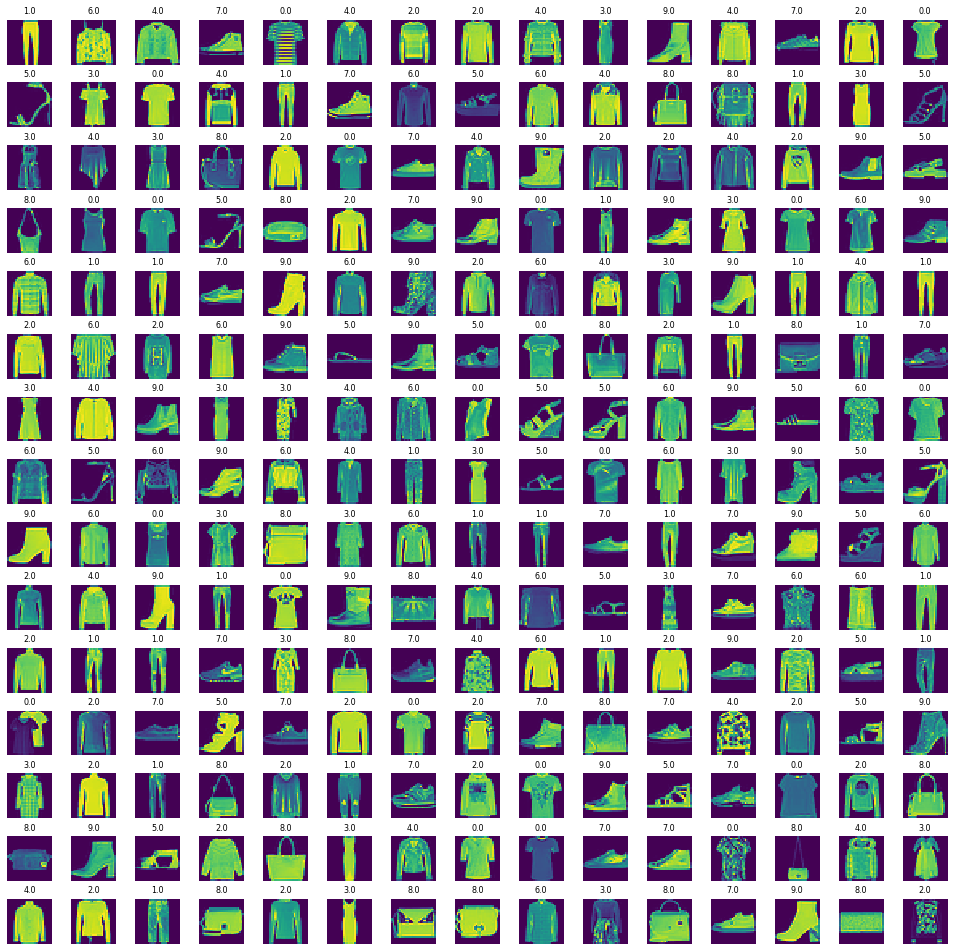

In [19]:
# to view images on grid format
# to define dimensions of the grid to be ploted
w_grid = 15 #width of the grid
l_grid = 15 #length of the grid 

fig, axes = plt.subplots(l_grid,w_grid, figsize = (17,17)) # plot returns figure object and axes object

axes = axes.ravel() #flaten the 15x15 matrix into 225 array, which means converting 2d objects to vectors to feed into the model

n_training = len(training)# to get the length of the training dataset


#to get a random value from 0 to n_training
for i in np.arange(0, w_grid * l_grid): # to get each variable/box within the grid evenly spaced
    index = np.random.randint(0, n_training)# to genrate random values/random images from 0 to the lenght of training 
    #read and display the image according the choosen index
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8) # to get the target class
    axes[i].axis('off') #show not show the axis details like pixel numbers
    
plt.subplots_adjust(hspace = 0.4) #set the height among the images 

# Training the Model

In [20]:
x_train = training [:, 1:]/255 # taking all rows, and all cloumns from 1 to n and to normalise the pixel values ranging from 0 - 255 to 0-1

In [21]:
y_train = training [:, 0] # only returning column 0 whihc has the traget class 

In [22]:
x_test = testing [:, 1:]/255 # taking all rows, and all cloumns from 1 to n and to normalise the pixel values ranging from 0 - 255 to 0-1

In [23]:
y_test = testing [:, 0] # only returning column 0 whihc has the traget class 

In [24]:
# to make a validate sets for x and y to use during training to generalize the model and avoid overfitting. This is seperate from training and test set but split from x_train and y_train
from sklearn.model_selection import train_test_split 
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

In [25]:
x_train.shape

(48000, 784)

In [26]:
y_train.shape

(48000,)

In [27]:
# to reshape all the arrays within eash set to 28 by 28 dimension 
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28,28,1))

In [28]:
x_train.shape


(48000, 28, 28, 1)

In [29]:
x_test.shape

(10000, 28, 28, 1)

In [30]:
x_validate.shape

(12000, 28, 28, 1)

In [3]:
import keras
# Import train_test_split from scikit library
# Import Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [31]:
cnn_model = Sequential() 
#trying 32 filters first then 64
cnn_model.add(Conv2D(32,(3,3), input_shape = (28,28,1), activation = 'relu'))# first layer is the convulational layer by adding (32,(3,3),and give 32 kernals and reshape with 28 x 28 dimensions with relu activation function
cnn_model.add(MaxPooling2D(pool_size = (2,2))) # 2,2 is the size of the pool
cnn_model.add(Dropout(0.25))# prevent overfitting it tries different combinations of artichectures to generalize the learning process
# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())# to get one single array to feed into the network 
cnn_model.add(Dense( activation = 'relu', units = 32)) # this specifies the hidden layer and avoid out_dim and use units 
cnn_model.add(Dense( activation = 'sigmoid',  units = 10))# this specifies the output player and avoid out_dim and use units 


In [32]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [33]:
epochs = 50

In [34]:
cnn_model.fit(x_train, y_train, batch_size = 512, nb_epoch = epochs, verbose = 1, validation_data = (x_validate, y_validate))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 12s 249us/step - loss: 0.9420 - accuracy: 0.6845 - val_loss: 0.4953 - val_accuracy: 0.8271
Epoch 2/50
48000/48000 [==============================] - 13s 260us/step - loss: 0.4740 - accuracy: 0.8342 - val_loss: 0.4190 - val_accuracy: 0.8564
Epoch 3/50
48000/48000 [==============================] - 12s 251us/step - loss: 0.4231 - accuracy: 0.8506 - val_loss: 0.3813 - val_accuracy: 0.8714
Epoch 4/50
48000/48000 [==============================] - 11s 237us/step - loss: 0.3828 - accuracy: 0.8669 - val_loss: 0.3584 - val_accuracy: 0.8776
Epoch 5/50
48000/48000 [==============================] - 11s 238us/step - loss: 0.3577 - accuracy: 0.8745 - val_loss: 0.3439 - val_accuracy: 0.8798
Epoch 6/50
48000/48000 [==============================] - 11s 229us/step - loss: 0.3462 - accuracy: 0.8791 - val_loss: 0.3260 - val_accuracy: 0.8864
Epoch 7/50
48000/48000 [==============================] 

In [35]:
evaluation = cnn_model.evaluate(x_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1])) # {:.3f} floating point


10000/10000 [==============================] - 1s 68us/step
Test Accuracy : 0.916


In [36]:
# to predict the test data
predicted_classes = cnn_model.predict_classes(x_test)


In [37]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

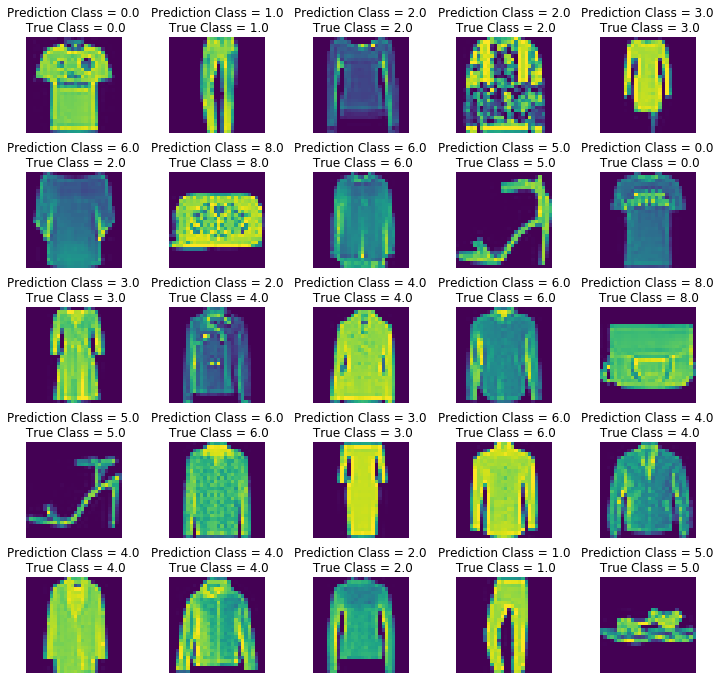

In [38]:
l = 5
w = 5
fig, axes = plt.subplots(l, w, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, l * w):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

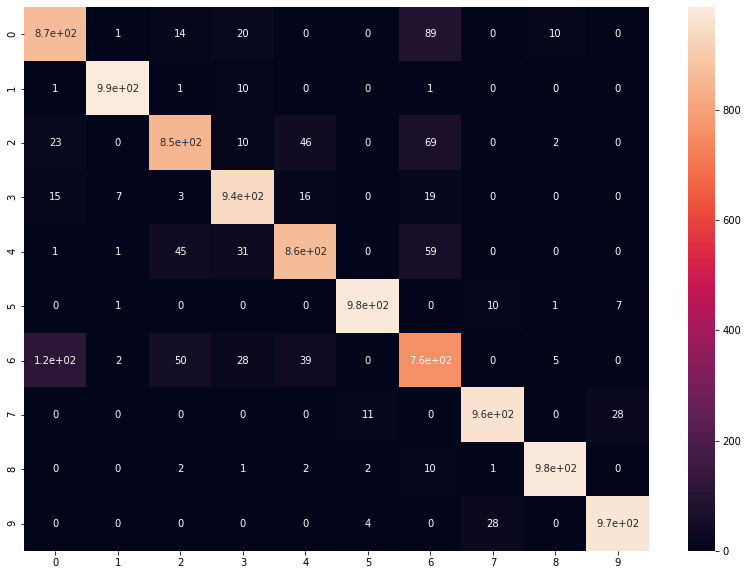

In [39]:
 from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values


In [40]:
from sklearn.metrics import classification_report

num_classes = 10 # target class number 
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))
#precision says how well images were classified in a particular class

              precision    recall  f1-score   support

     Class 0       0.85      0.87      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.88      0.85      0.87      1000
     Class 3       0.90      0.94      0.92      1000
     Class 4       0.89      0.86      0.88      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.75      0.76      0.76      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

